2022-11-04 10:36:09,049 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-11-04 10:36:09,049 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-11-04 10:36:09,062 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-11-04 10:36:09,062 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-11-04 10:36:09,066 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-11-04 10:36:09,066 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-11-04 10:36:09,070 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-11-04 10:36:09,070 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-11-04 10:36:09,075 - INFO - tvb_multiscale.tv

Outputs' path: /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/outputs/tvb_nest_rs
Config (
  title .............................. 'Config gid: 041f17e3-576a-49a7-8ad7-dd811ad3bb59'
  Type ............................... 'Config'
  gid ................................ UUID('041f17e3-576a-49a7-8ad7-dd811ad3bb59')
  config.gid ......................... UUID('041f17e3-576a-49a7-8ad7-dd811ad3bb59')
  config.title ....................... 'Config gid: 041f17e3-576a-49a7-8ad7-dd811ad3bb59'
  config.log ......................... <Logger tvb_multiscale.tvb_nest.config (DEBUG)>
  config.out ......................... OutputConfig gid: 0f856bda-5eb6-4eae-aced-611db1f00bcd
  config.figures ..................... FiguresConfig
  config.DEFAULT_SUBJECT[connectivity]  Connectivity gid: 137a0b04-c53b-4441-ac7b-796264d8ca0a
  config.DEFAULT_SUBJECT[cortex] ..... Cortex gid: bada14c6-f345-4cf7-a767-a856cb160069
  config.DEFAULT_SUBJECT_PATH ........ '/home/docker/packages/tvb-m

Normalizing connectivity weights with 99 percentile!
Configuring model with parameters:
OrderedDict([('G', 1.0), ('STIMULUS', 0.1), ('I_e', -0.35), ('I_s', 0.08), ('w_ie', -3.0), ('w_rs', -2.0)])
Fixing thalamocortical weights!
Fixing thalamocortical delays!
Applying FIC for parameter I_e: G * FIC * FIC_SPLIT = 1 * 1 * 0.25 = 0.25!


/home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/scripts/tvb_script.py:294: UserWarning: 
  warnings.warn(str(e))


<Figure size 432x288 with 0 Axes>

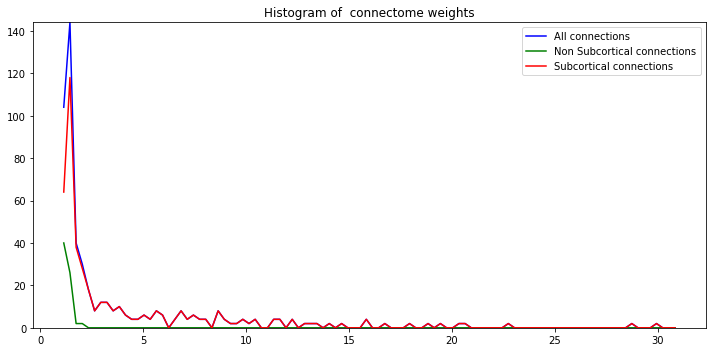

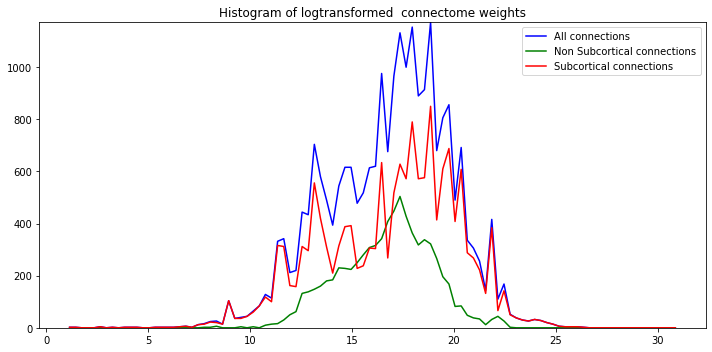

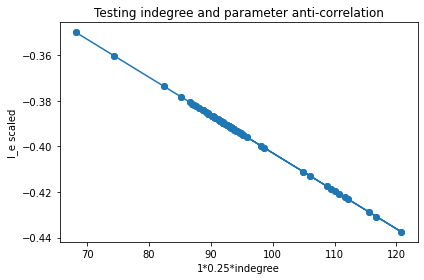

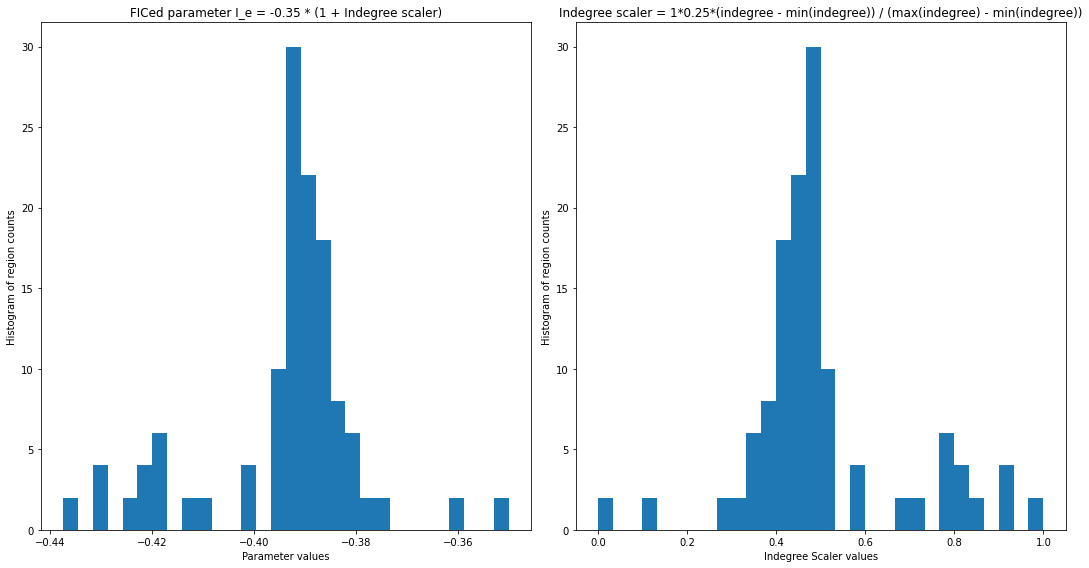

Applying FIC for parameter w_ie: G * FIC * (1.0-FIC_SPLIT) = 1 * 1 * 0.75 = 0.75!


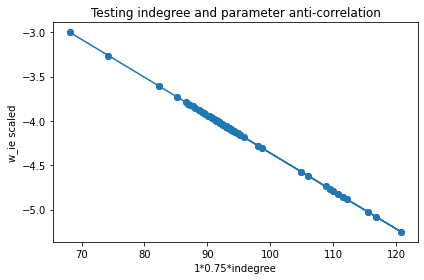

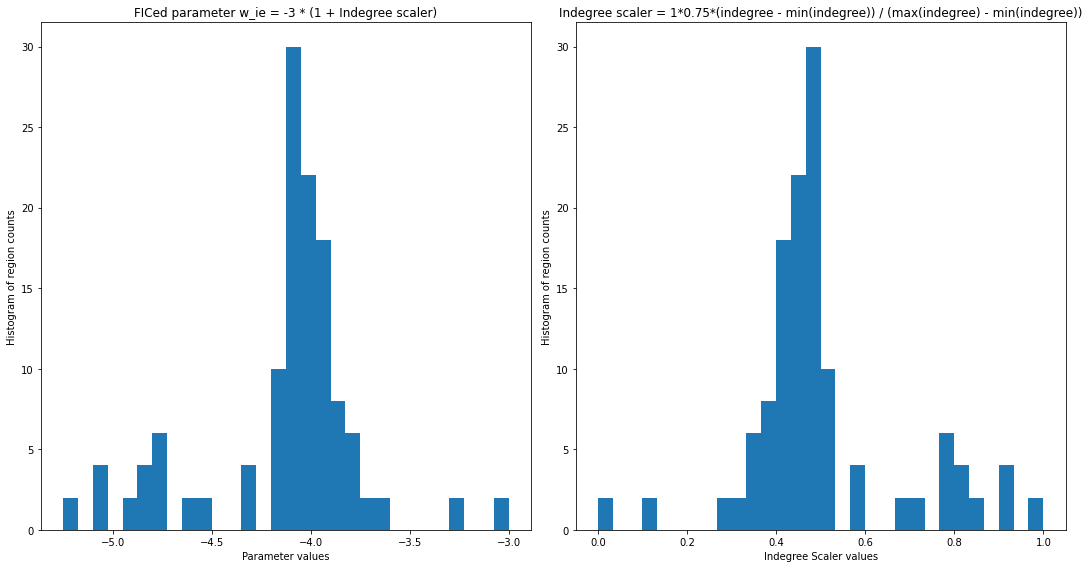

2022-11-04 10:36:12,247 - WARNING - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!


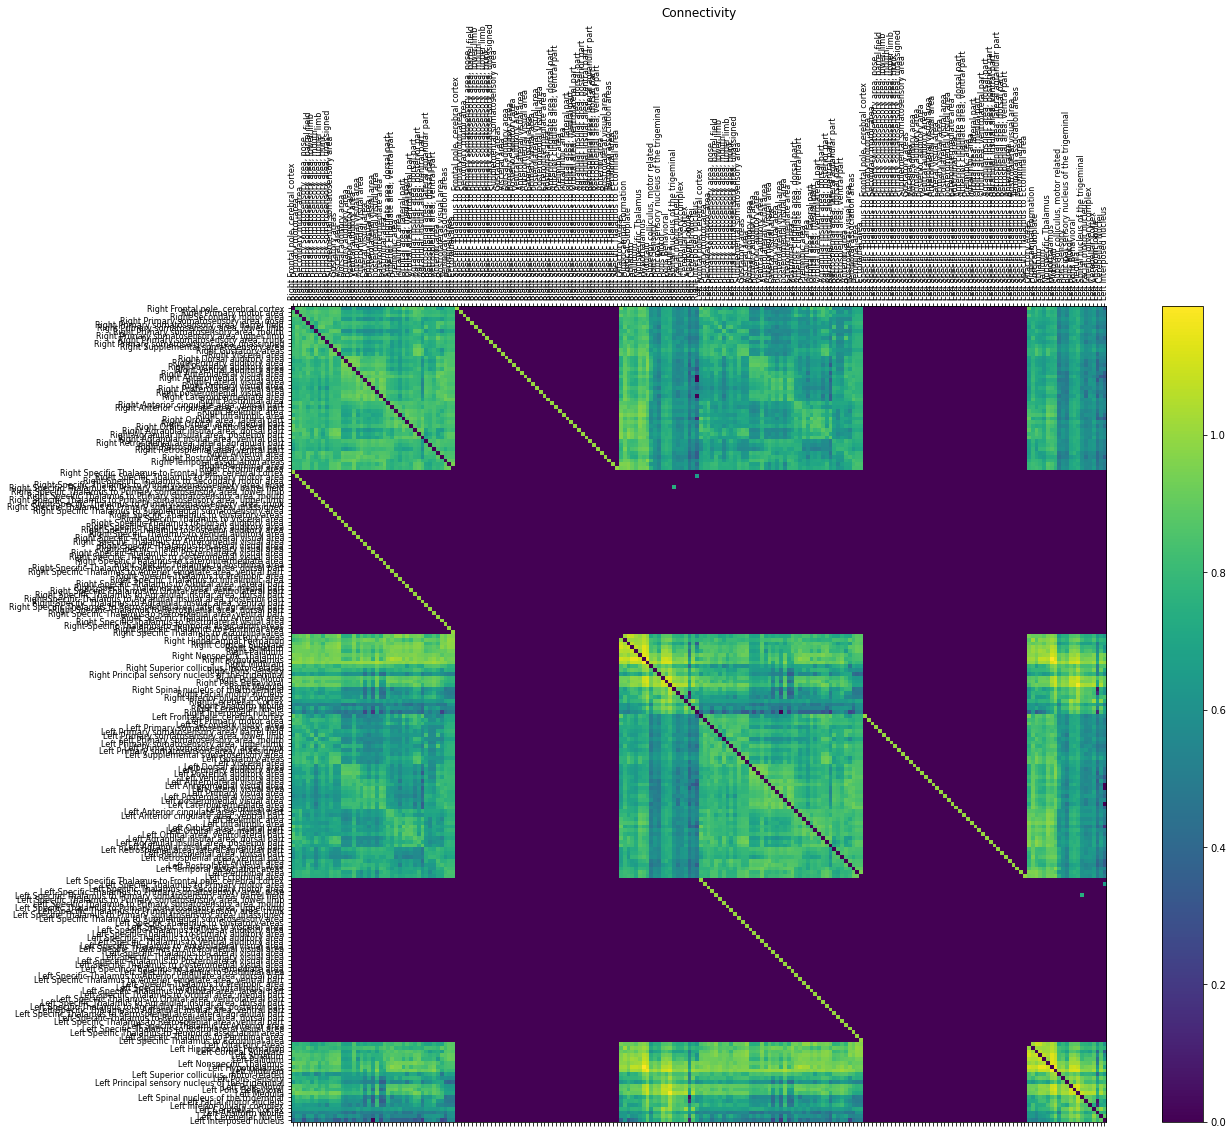

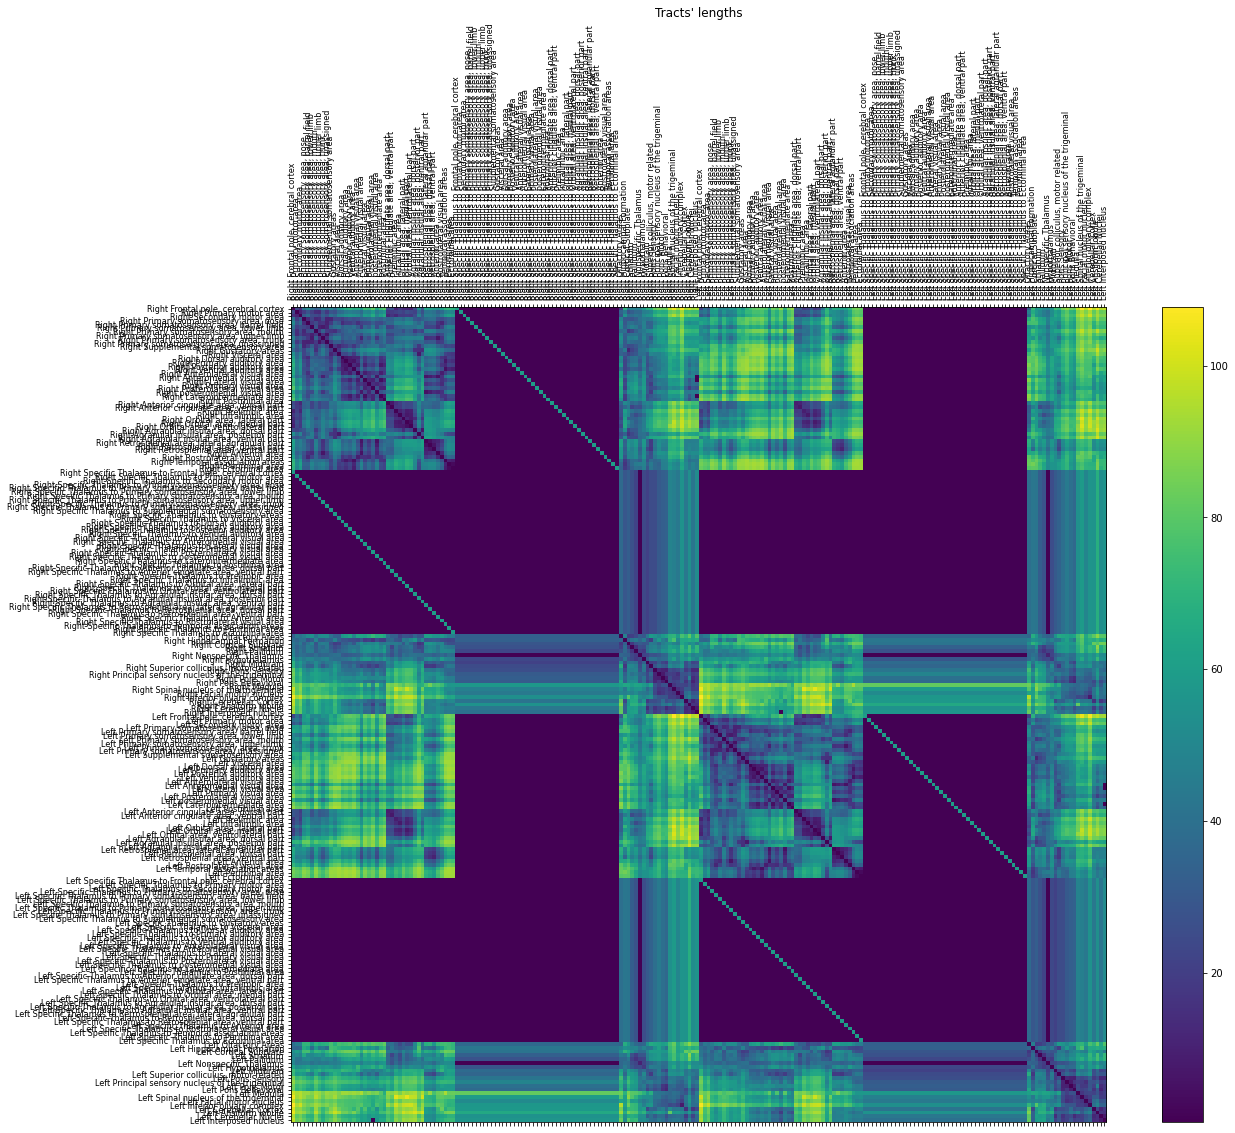

In [1]:
from examples.tvb_nest.notebooks.cerebellum.scripts.scripts import *

from examples.tvb_nest.notebooks.cerebellum.scripts.base import DEFAULT_ARGS

# Code repeating what is done in scripts.tvb_nest_script.run_tvb_nest_workflow() function:

# Inputs to run_tvb_nest_workflow()
PSD_target = None
model_params = {} # outputs/cwc_FIC_I_e_w_ie/code
config = None
write_files = True
config_args = {"output_folder": "tvb_nest_rs"}

plot_flag = config_args.get('plot_flag', DEFAULT_ARGS.get('plot_flag'))
config, plotter = assert_config(config, return_plotter=True, **config_args)
config.model_params.update(model_params)
if config.VERBOSE:
    print("\n\n------------------------------------------------\n\n"+
          "Running TVB-NEST workflow for plot_flag=%s, write_files=%s,\nand model_params=\n%s...\n" 
          % (str(plot_flag), str(write_files), str(config.model_params)))
# config.SIMULATION_LENGTH = 100.0

# Load and prepare connectome and connectivity with all possible normalizations:
connectome, major_structs_labels, voxel_count, inds, maps = prepare_connectome(config, plotter=plotter)
connectivity = build_connectivity(connectome, inds, config)

# Prepare model
model = build_model(connectivity.number_of_regions, inds, maps, config)

# Prepare simulator
simulator = build_simulator(connectivity, model, inds, maps, config, plotter=plotter)


In [2]:
simulator.model.G[0].item()

0.0078125

In [3]:
# Build NEST network
nest_network, nest_nodes_inds, neuron_models, neuron_number = build_NEST_network(config)



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: HEAD@c545255f7
 Built: May 18 2022 09:50:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

FAILED! Needing to compile it first!
Compiling cereb module...



-------------------------------------------------------
cerebmodule Configuration Summary
-------------------------------------------------------

C++ compiler         : /usr/bin/c++
Build static libs    : OFF
C++ compiler flags   : 
NEST compiler flags  :  -std=c++11 -O2 -Wall -fopenmp  -fdiagnostics-color=auto
NEST include dirs    :  -I/home/docker/env/neurosci/nest_build/include/nest -I/usr/include -I/usr/include -I/usr/include -I/usr/include
NEST libraries flags : -L/home/docker/env/neurosci/nest_build/lib/nest -lnestutil -lnest -lsli -lnestkernel -fopenmp /usr/lib/x86_64-linux-gnu/libltdl.so /usr/lib/x86_64-linux-gnu/libreadline.so /usr/lib/x86_64-linux-gnu/libncurses.so /usr/lib/x86_64-linux-gnu/libgsl.so /usr/lib/x86_64-linux-gnu/libgslcblas.so   /usr/lib/libmpicxx.so /usr/lib/libmpi.so

-------------------------------------------------------

You can now build and install 'cerebmodule' using
  make
  make install

The library file libcerebmodule.so will be installed to
  /home

(b'-- Configuring done\n-- Generating done\n-- Build files have been written to: /home/docker/packages/tvb-multiscale/tvb_multiscale/tvb_nest/nest/modules/cereb/build\nScanning dependencies of target cerebmodule_module\n[ 16%] Building CXX object CMakeFiles/cerebmodule_module.dir/cerebmodule.o\n[ 33%] Building CXX object CMakeFiles/cerebmodule_module.dir/eglif_cond_alpha_multisyn.o\n[ 50%] Linking CXX shared module cerebmodule.so\n[ 50%] Built target cerebmodule_module\nScanning dependencies of target cerebmodule_lib\n[ 66%] Building CXX object CMakeFiles/cerebmodule_lib.dir/cerebmodule.o\n[ 83%] Building CXX object CMakeFiles/cerebmodule_lib.dir/eglif_cond_alpha_multisyn.o\n[100%] Linking CXX shared library libcerebmodule.so\n[100%] Built target cerebmodule_lib\n[ 50%] Built target cerebmodule_module\n[100%] Built target cerebmodule_lib\nInstall the project...\n-- Install configuration: ""\n-- Installing: /home/docker/env/neurosci/nest_build/cerebmodule.so\n', None)
Installing cereb m

In [4]:
#nest.Install('cerebmodule')

In [5]:
# pwd=os.getcwd()
# import nest
# import subprocess
# cereb_path = '/home/docker/packages/tvb-multiscale/tvb_multiscale/tvb_nest/nest/modules/cereb'
# os.chdir(os.path.join(cereb_path, 'build'))
# p = subprocess.Popen("cmake -Dwith-nest=/home/docker/env/neurosci/nest_build/bin/nest-config ..; make; make install",
#                              stdout=subprocess.PIPE, shell=True)
# print(p.communicate())

# nest.Install('cerebmodule')
# os.chdir(pwd)

In [6]:
#before running the below code, make sure that you locally add the file here: 
# /home/docker/packages/tvb-multiscale/examples/data/cerebellum/balanced_DCN_IO.hdf5
# nest_network, nest_nodes_inds, neuron_models, neuron_number = build_NEST_network(config)

In [7]:
# nest_network.nest_instance.Simulate(config.SIMULATION_LENGTH)

# nest_network = simulate_nest_network(nest_network, config, neuron_models, neuron_number, plot_flag=True)


In [8]:
# Build TVB-NEST interfaces
simulator, nest_network = build_tvb_nest_interfaces(simulator, nest_network, nest_nodes_inds, config)


2022-11-04 10:37:21,792 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for ['E']->['mossy_fibers'] created!
2022-11-04 10:37:21,792 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for ['E']->['mossy_fibers'] created!
2022-11-04 10:37:21,806 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_recorder for ['granule_cell']->['E'] created!
2022-11-04 10:37:21,806 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_recorder for ['granule_cell']->['E'] created!
2022-11-04 10:37:24,165 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_re

In [9]:
# Confirming that we got our special coupling for the TVB->NEST interface CosimCouplingMonitor:
simulator.cosim_monitors[0].coupling


In [10]:
# Simulate TVB-NEST model
results, transient, simulator, nest_network = simulate_tvb_nest(simulator, nest_network, config)


Simulating TVB-NEST...
2022-11-04 10:37:35,305 - ERROR - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Bad Simulator.integrator.noise.nsig shape: (2, 1, 1)
2022-11-04 10:37:35,323 - WARNING - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
...1.418% completed in 12.5689 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 1 last spike(s) of the input spiketrain


...1.507% completed in 13.2864 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 12 last spike(s) of the input spiketrain


...1.596% completed in 13.971 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 7 last spike(s) of the input spiketrain


...1.684% completed in 14.6642 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 21 last spike(s) of the input spiketrain


...1.773% completed in 15.4959 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 4 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 53 last spike(s) of the input spiketrain


...1.862% completed in 16.2127 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 9 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 11 last spike(s) of the input spiketrain


...1.950% completed in 16.9107 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 38 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 56 last spike(s) of the input spiketrain


...2.128% completed in 18.4813 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 20 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 63 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 33 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 6 last spike(s) of the input spiketrain


...2.216% completed in 19.2293 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 31 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 18 last spike(s) of the input spiketrain


...2.305% completed in 19.949 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 17 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 14 last spike(s) of the input spiketrain


...2.394% completed in 20.7412 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 19 last spike(s) of the input spiketrain


...2.482% completed in 21.5281 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 24 last spike(s) of the input spiketrain


...2.660% completed in 23.0083 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 8 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 16 last spike(s) of the input spiketrain


...2.926% completed in 25.1292 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 5 last spike(s) of the input spiketrain


...3.014% completed in 25.8568 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 2 last spike(s) of the input spiketrain


...3.103% completed in 26.5895 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 13 last spike(s) of the input spiketrain


...3.191% completed in 27.3136 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 28 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 3 last spike(s) of the input spiketrain


...3.280% completed in 28.072 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 22 last spike(s) of the input spiketrain


...3.546% completed in 30.2829 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 23 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 10 last spike(s) of the input spiketrain


...3.989% completed in 33.9814 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 40 last spike(s) of the input spiketrain


...4.078% completed in 34.8211 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 29 last spike(s) of the input spiketrain


...4.255% completed in 36.5163 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 25 last spike(s) of the input spiketrain


...4.344% completed in 37.2343 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 15 last spike(s) of the input spiketrain


...16.046% completed in 132.517 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 26 last spike(s) of the input spiketrain


...17.553% completed in 145.36 sec!!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 27 last spike(s) of the input spiketrain


...17.730% completed in 146.811 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 30 last spike(s) of the input spiketrain


...73.316% completed in 602.126 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 32 last spike(s) of the input spiketrain


...78.191% completed in 642.546 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 37 last spike(s) of the input spiketrain


...100.000% completed in 823.88 sec!
Simulated in 835.793879 secs!


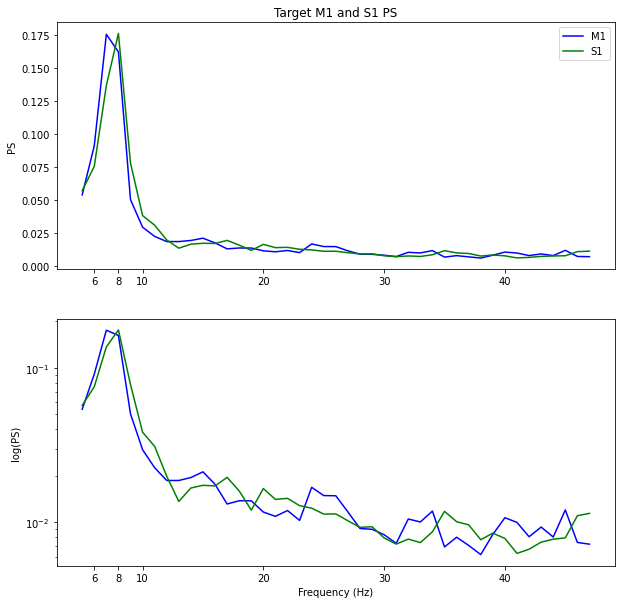

In [11]:
if PSD_target is None:
    # This is the PSD target we are trying to fit...
    if config.model_params['G']:
            # ...for a connected brain, i.e., PS of bilateral M1 and S1:
        PSD_target = compute_target_PSDs_m1s1brl(config, write_files=True, plotter=plotter)
    else:
        # ...for a disconnected brain, average PS of all regions:
        PSD_target = compute_target_PSDs_1D(config, write_files=True, plotter=plotter)

/home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/scripts/tvb_script.py:715: UserWarning:H5Writer cannot be imported! Probably you haven't installed tvb_framework.


Pickle-dumping source_ts to /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/outputs/tvb_nest_rs/res/source_ts.pkl!
Pickle-dumping bold_ts to /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/outputs/tvb_nest_rs/res/bold_ts.pkl!


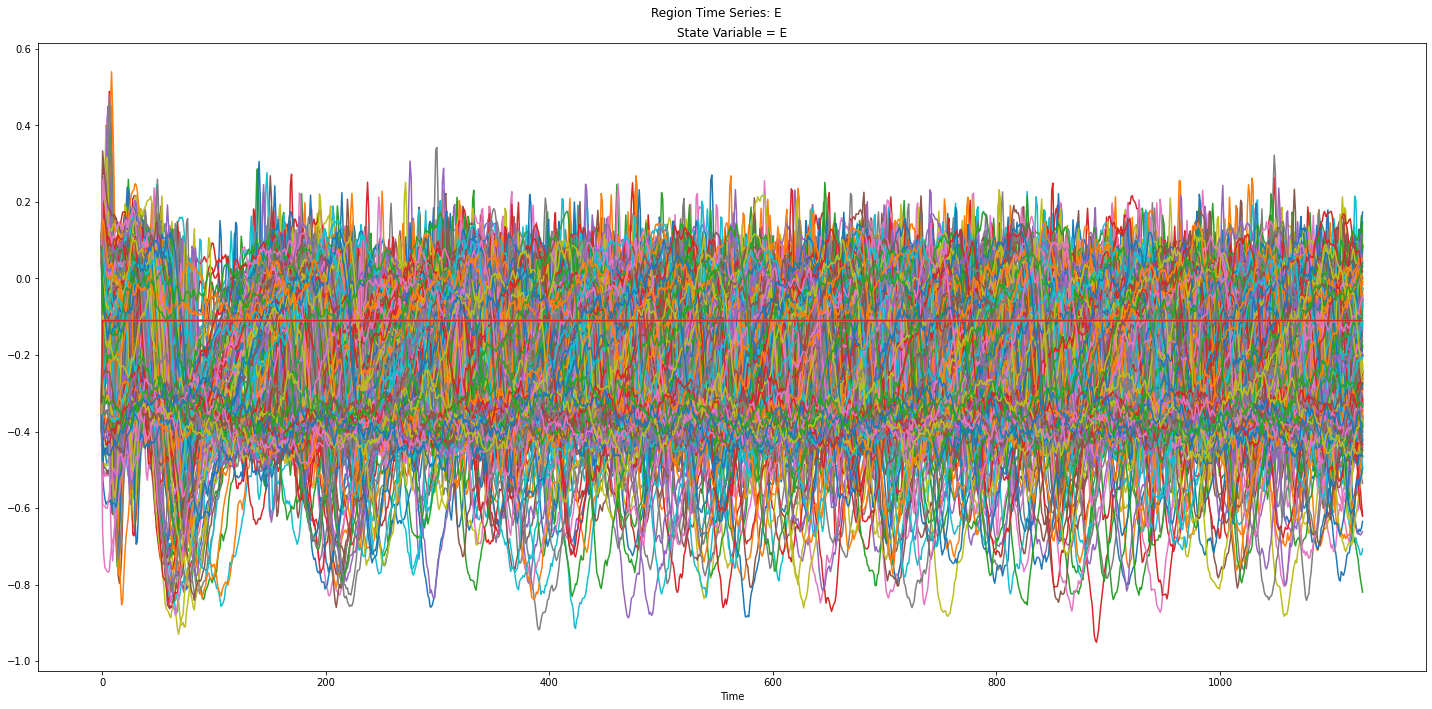

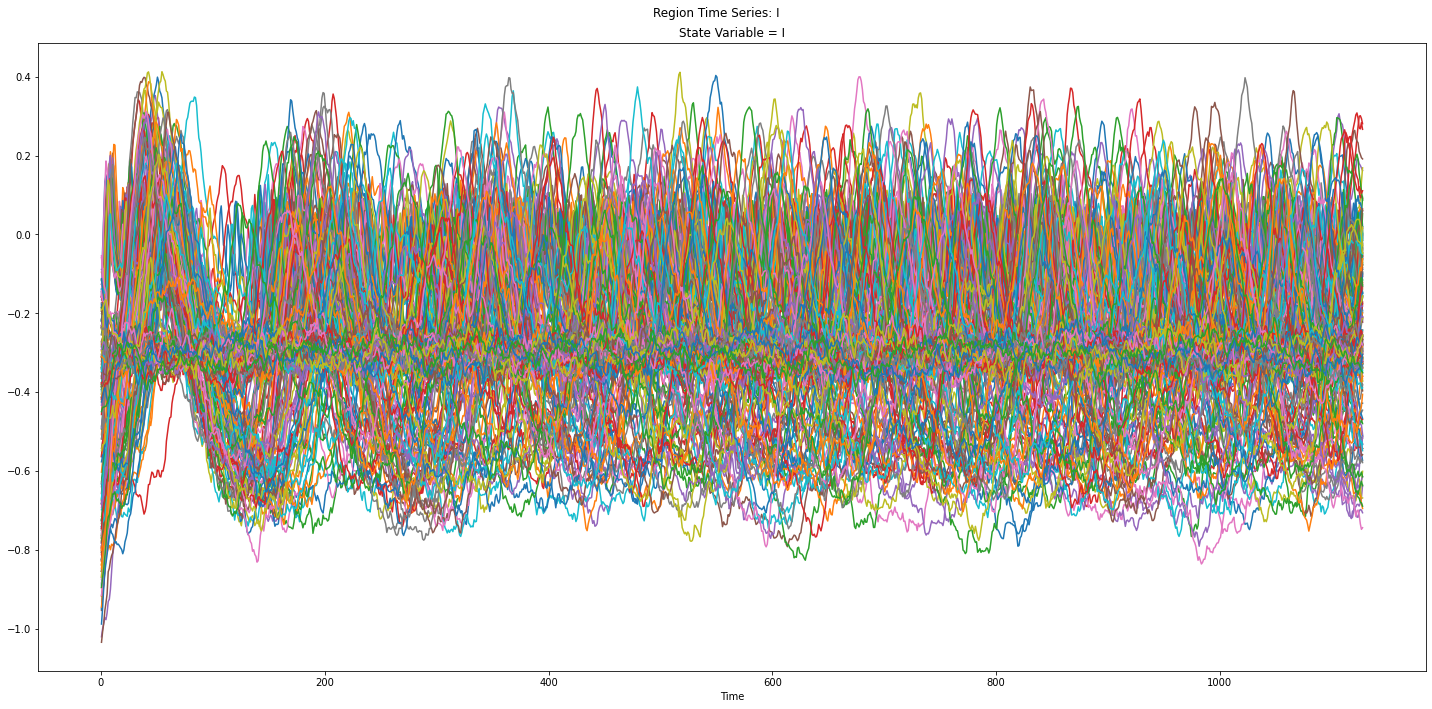

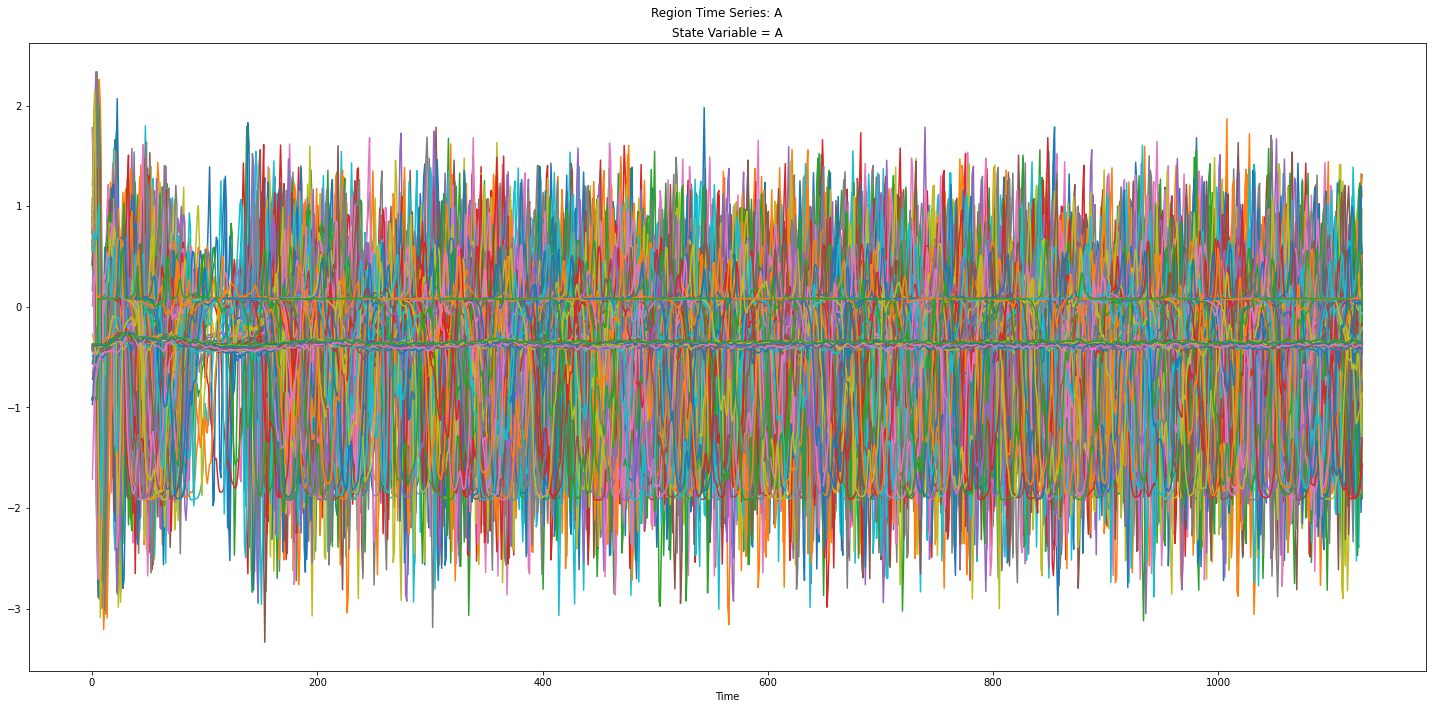

2022-11-04 10:51:29,151 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:29,152 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-11-04 10:51:29,160 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:29,163 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


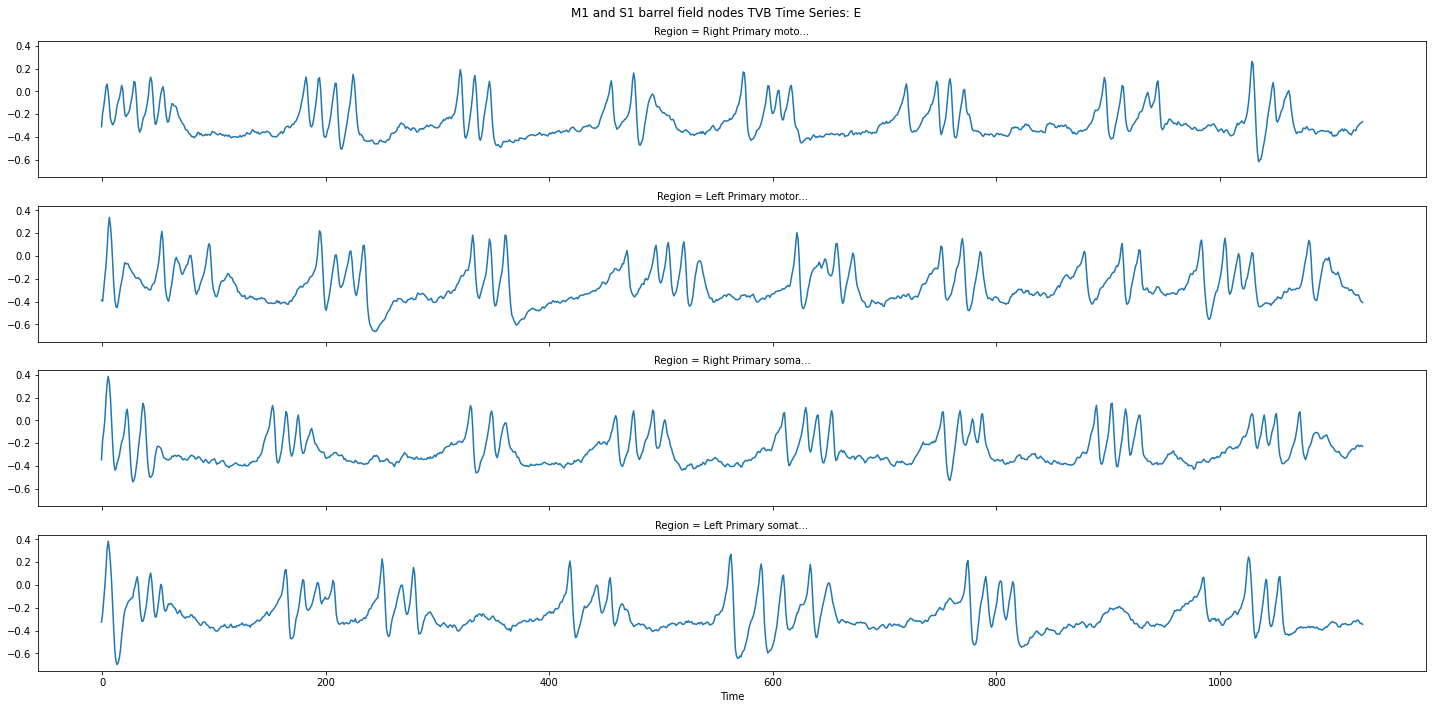

2022-11-04 10:51:30,007 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:30,008 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


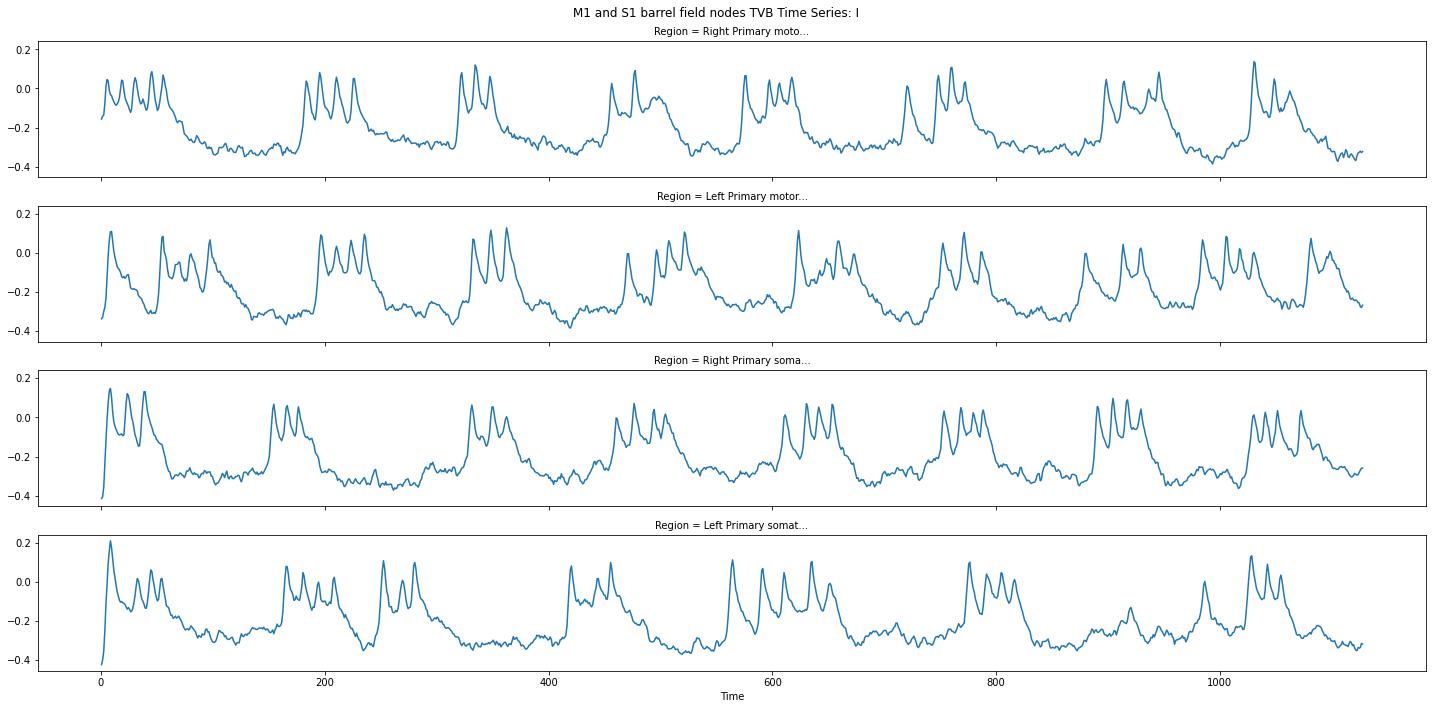

2022-11-04 10:51:30,805 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:30,807 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


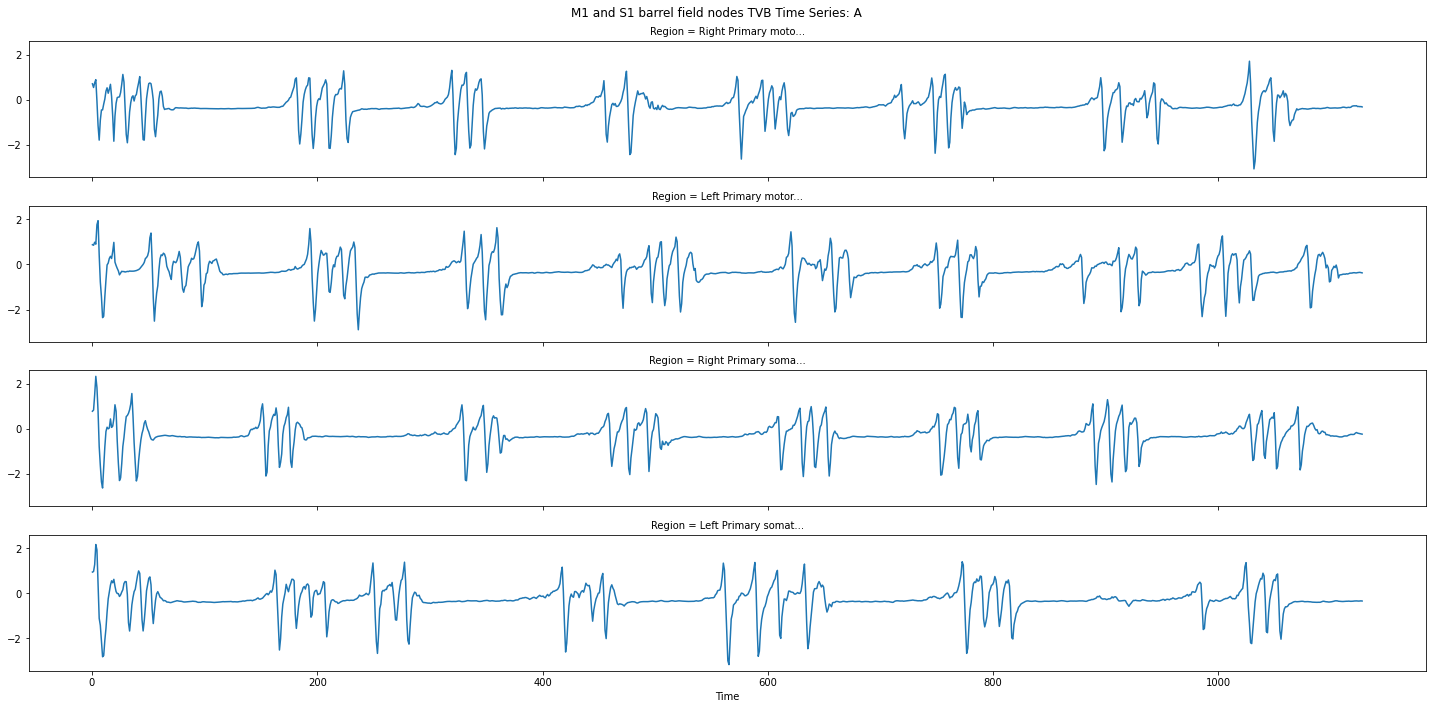

2022-11-04 10:51:31,594 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:31,595 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-11-04 10:51:31,605 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:31,607 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


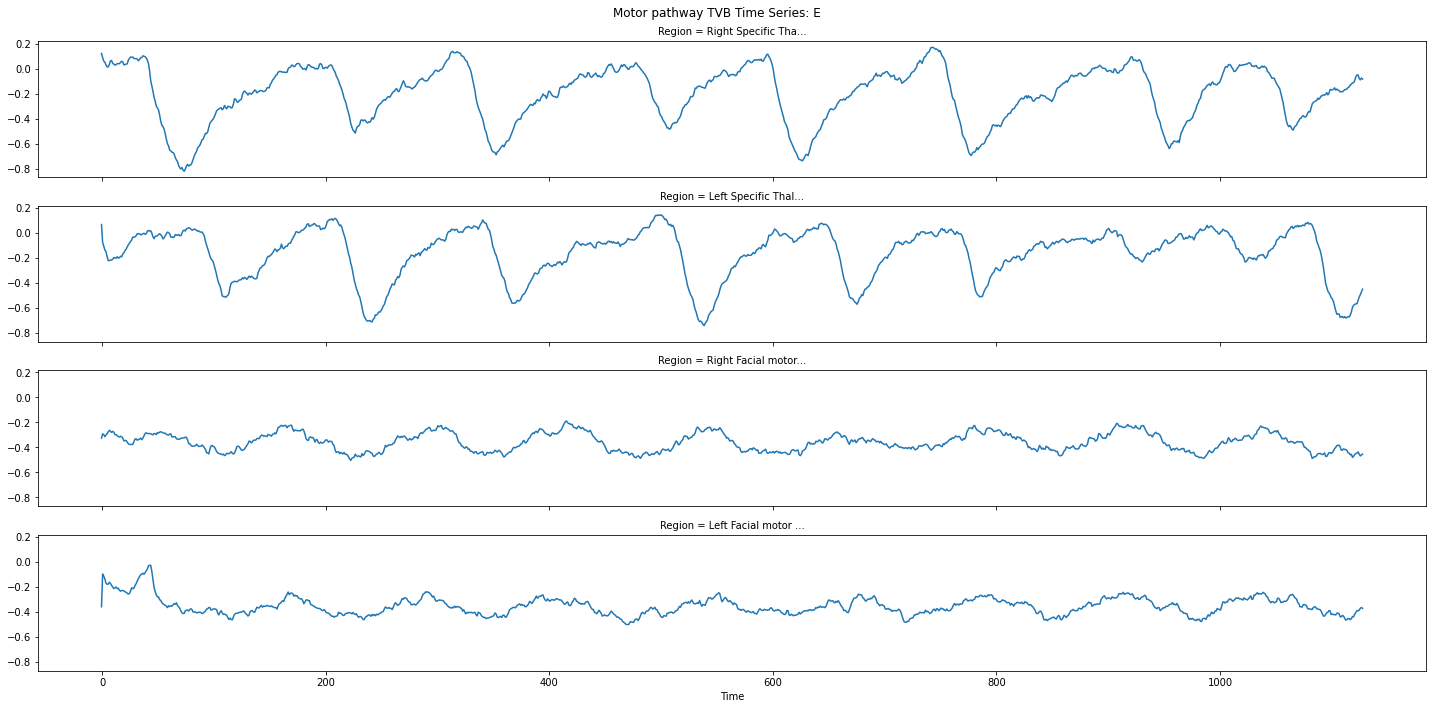

2022-11-04 10:51:32,457 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:32,459 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


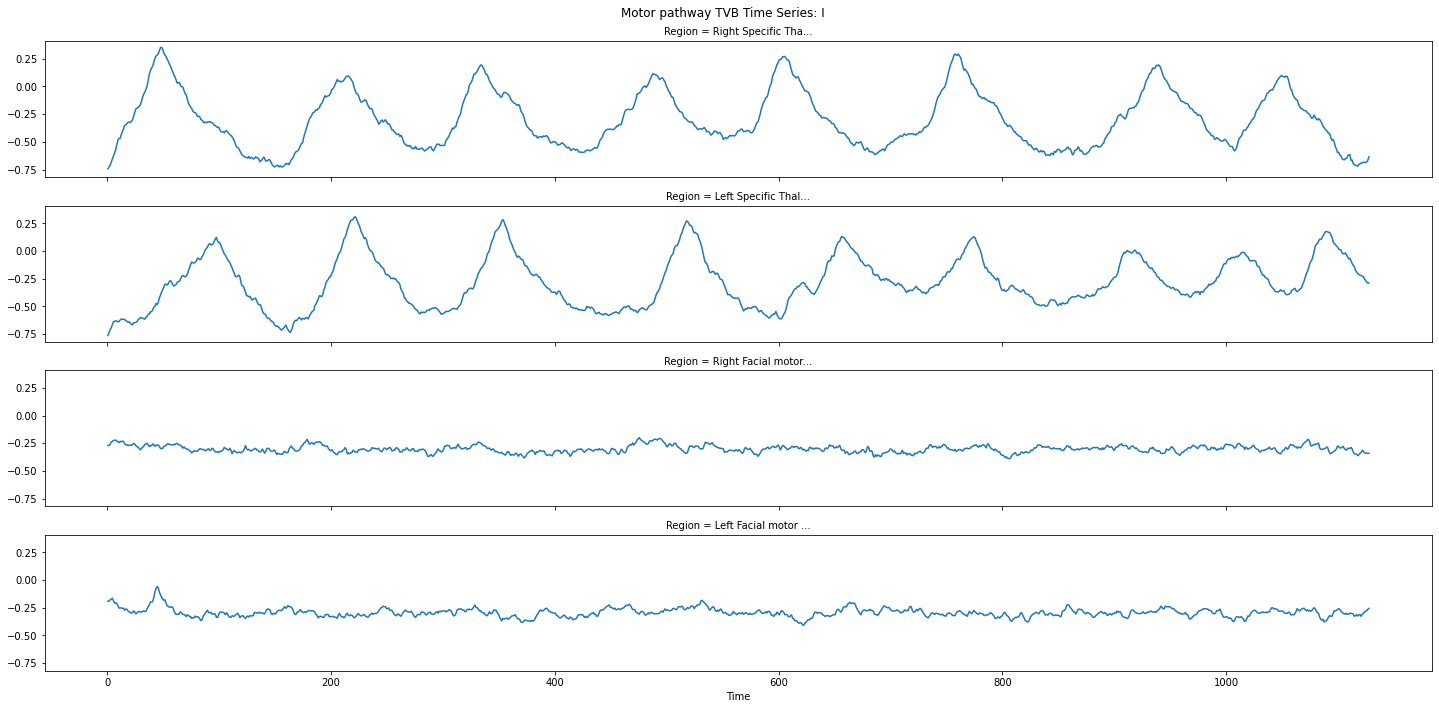

2022-11-04 10:51:33,245 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:33,247 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


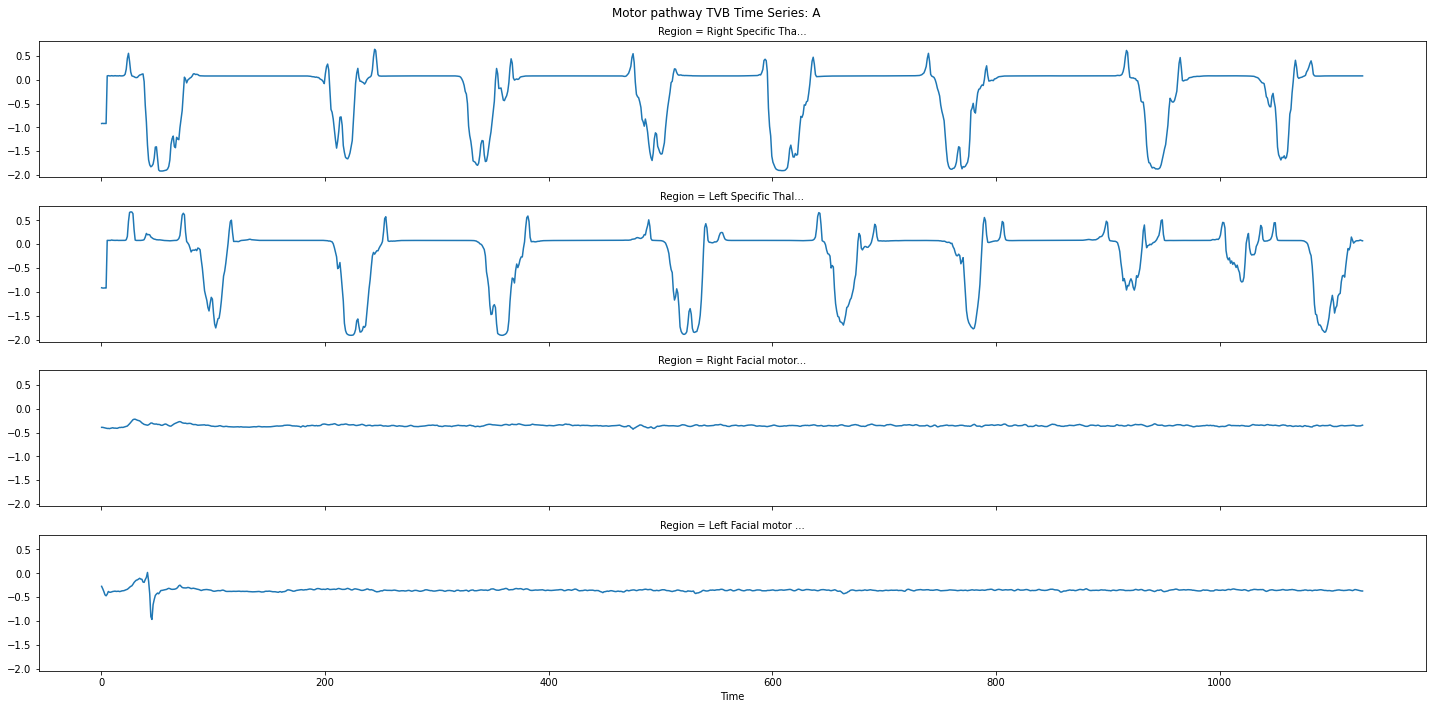

2022-11-04 10:51:34,100 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:34,101 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-11-04 10:51:34,110 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:34,111 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


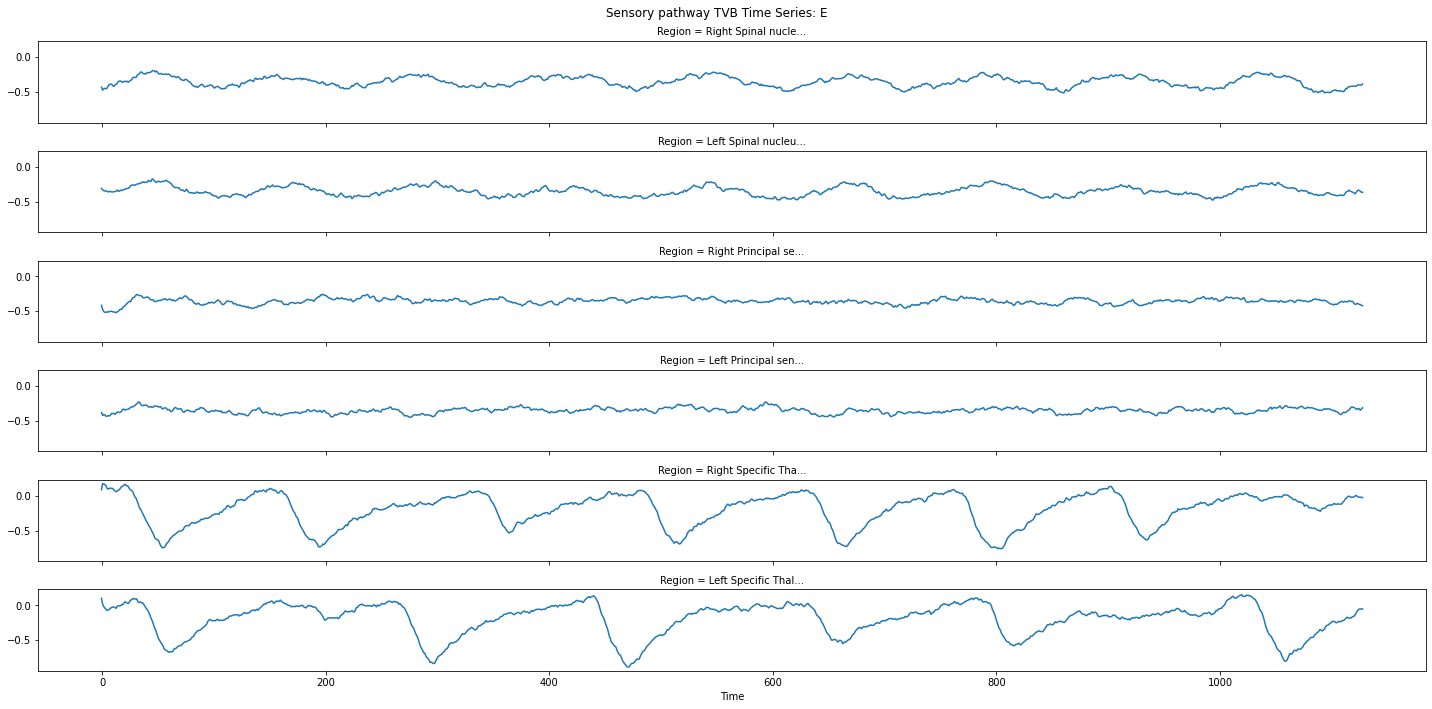

2022-11-04 10:51:35,353 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:35,354 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


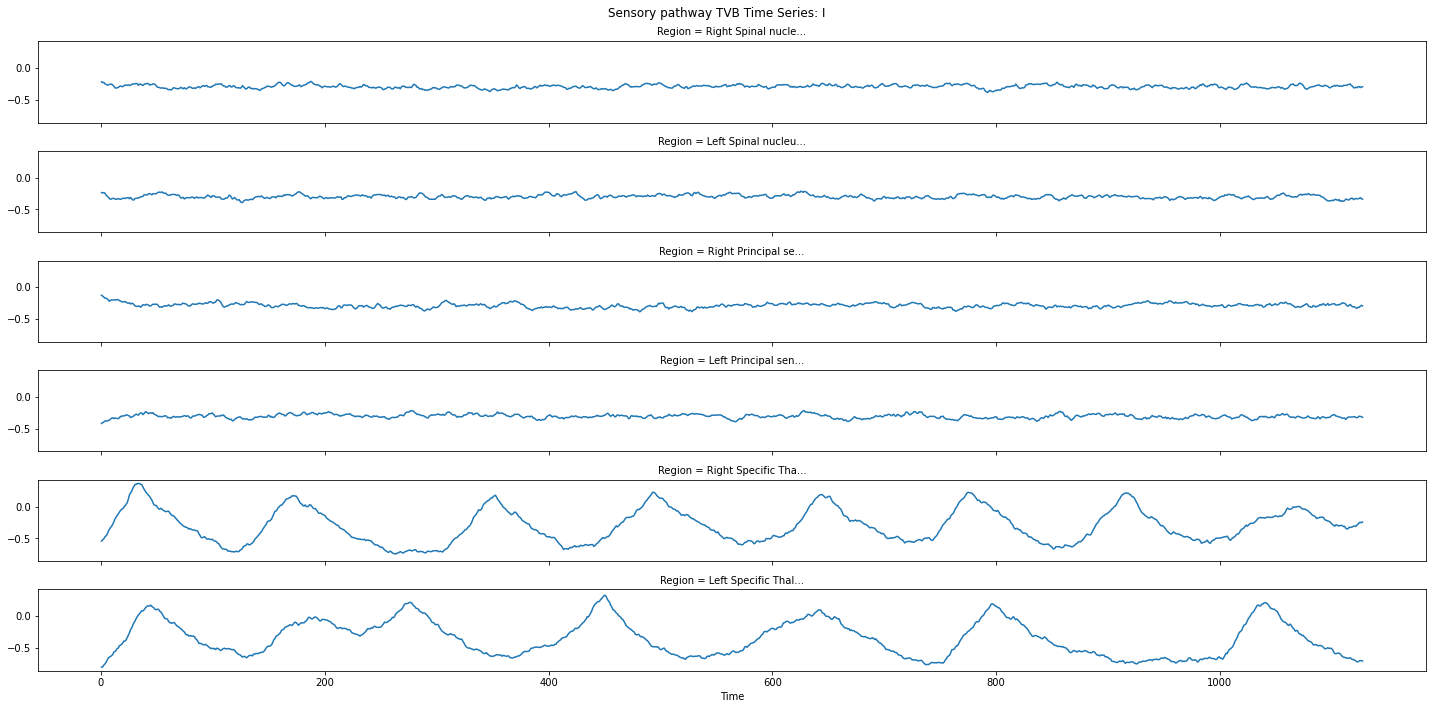

2022-11-04 10:51:36,392 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:36,393 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


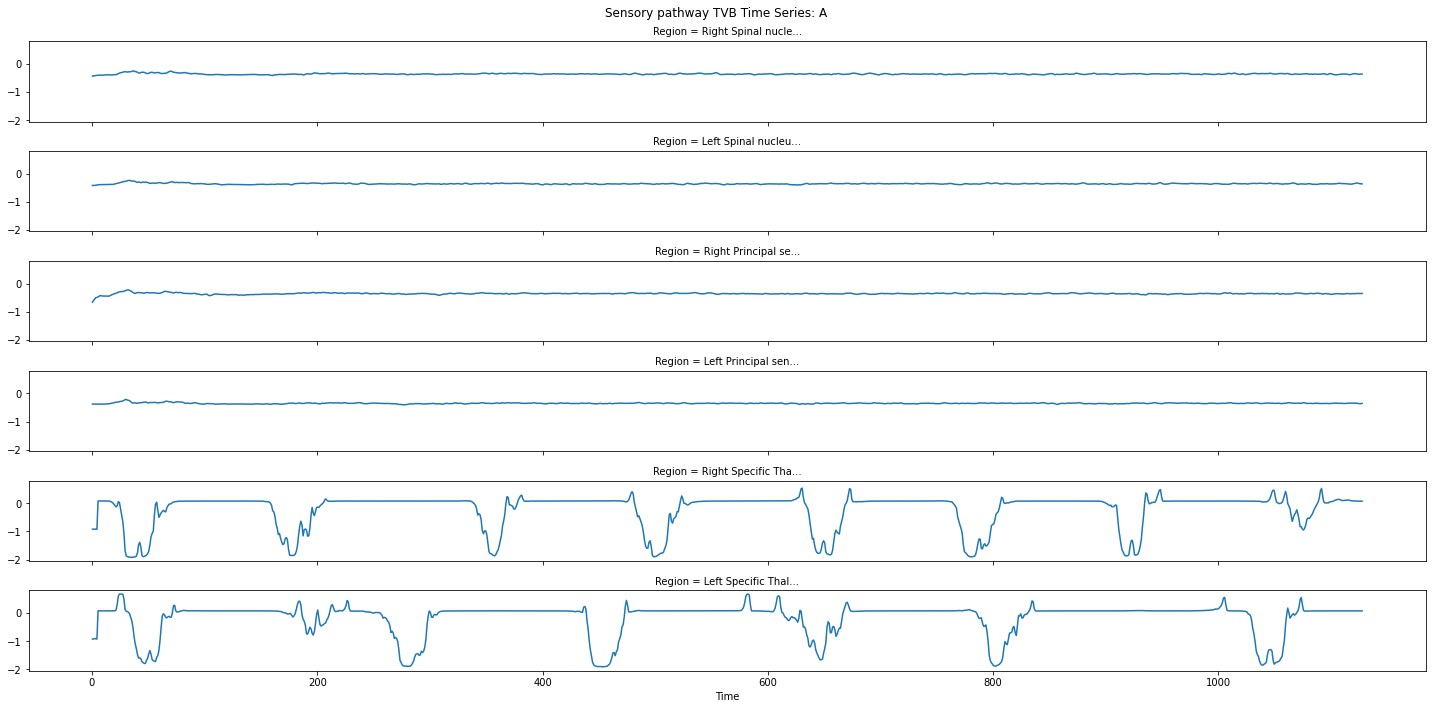

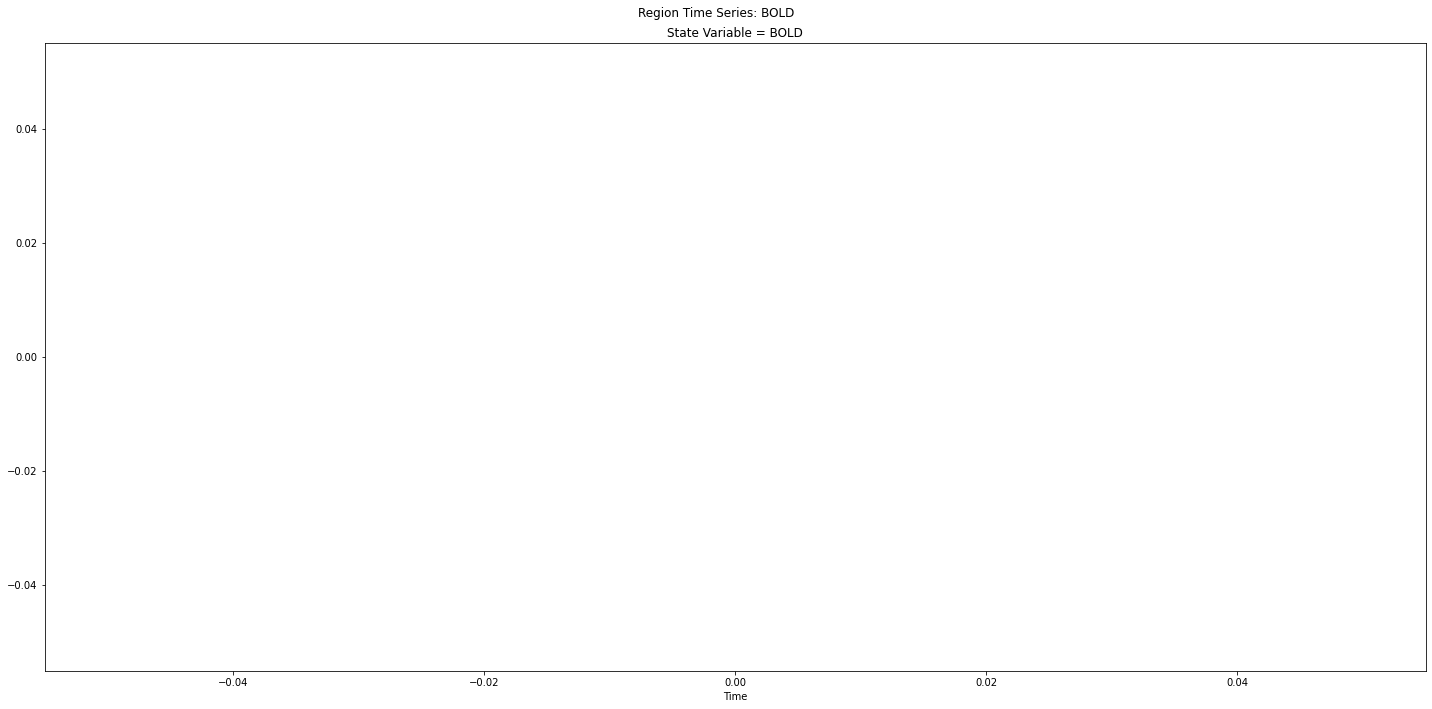

2022-11-04 10:51:38,054 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:38,055 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


/home/docker/env/neurosci/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning:nperseg = 2048 is greater than input length  = 1026, using nperseg = 1026


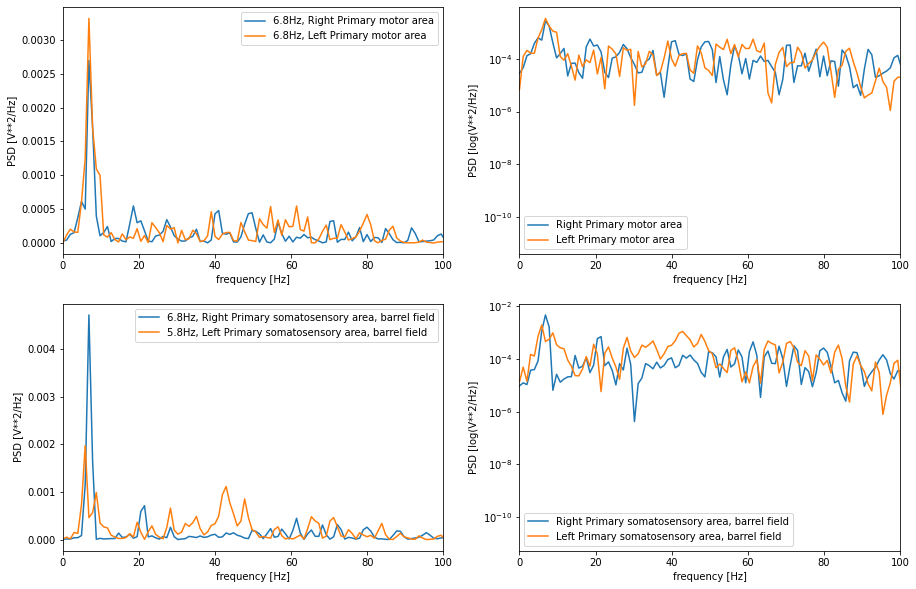

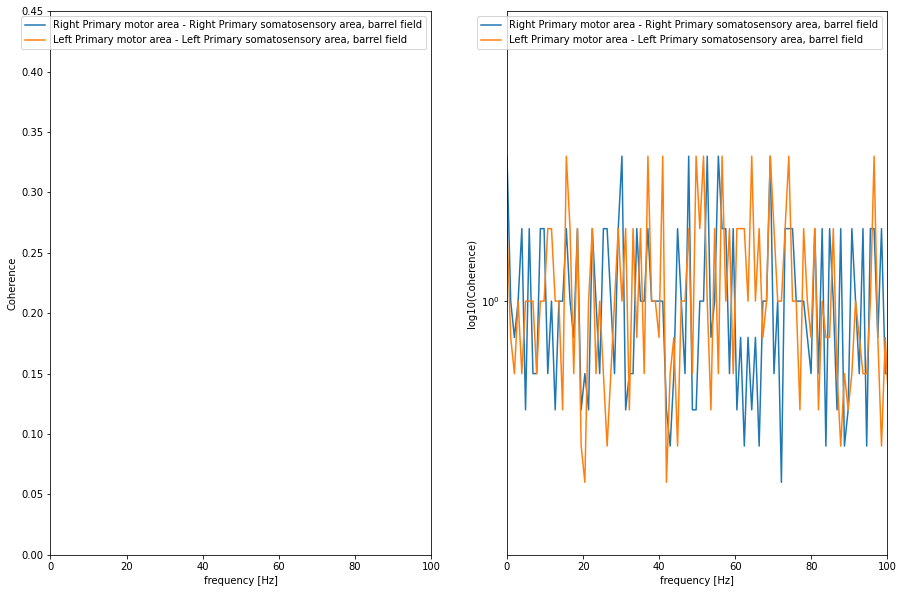

2022-11-04 10:51:39,710 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-04 10:51:39,712 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


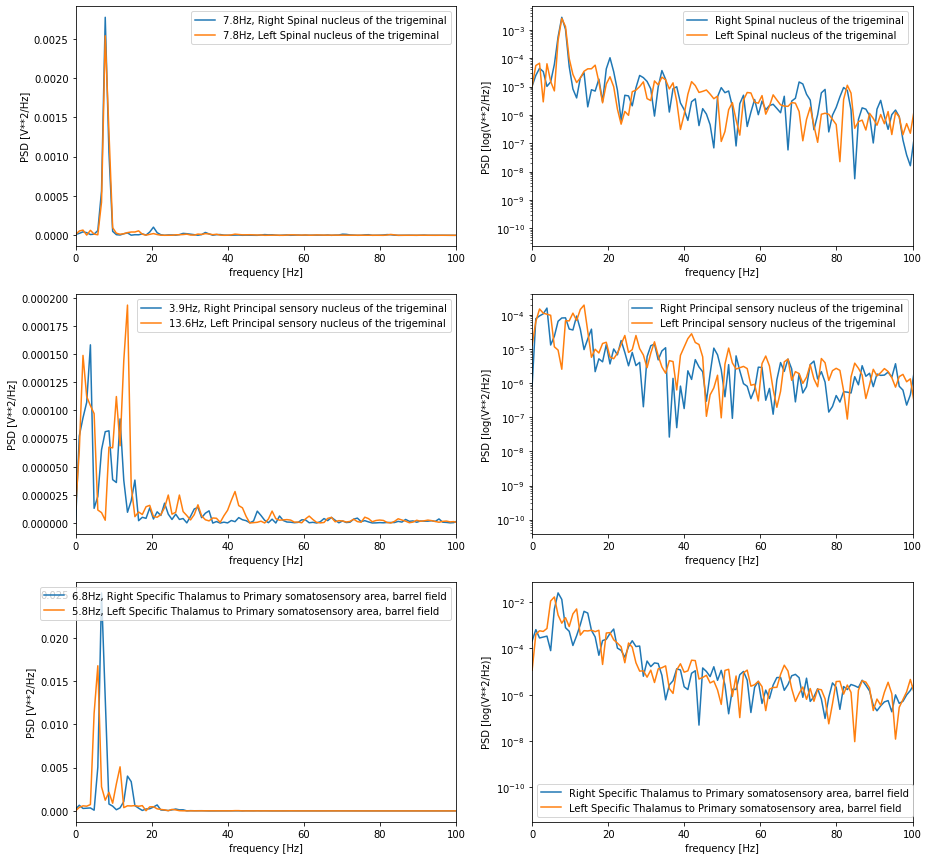

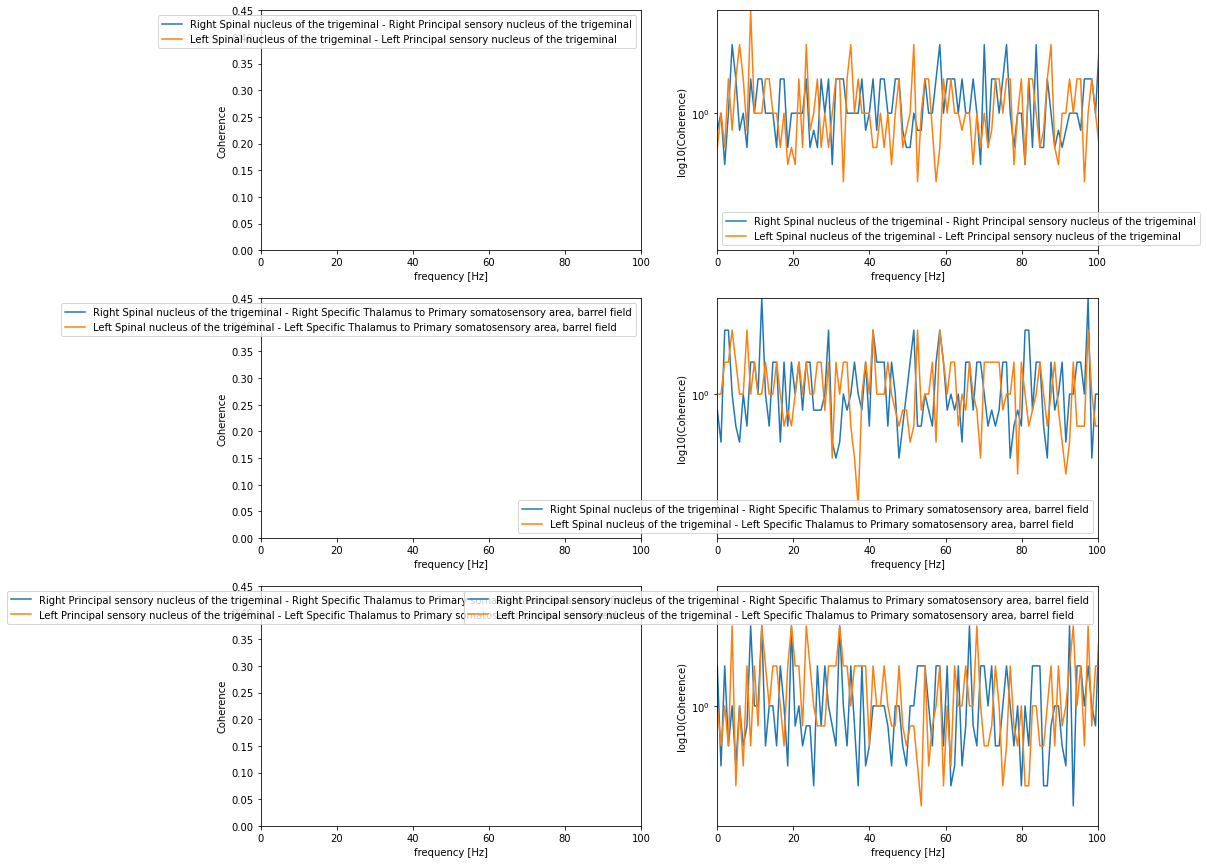

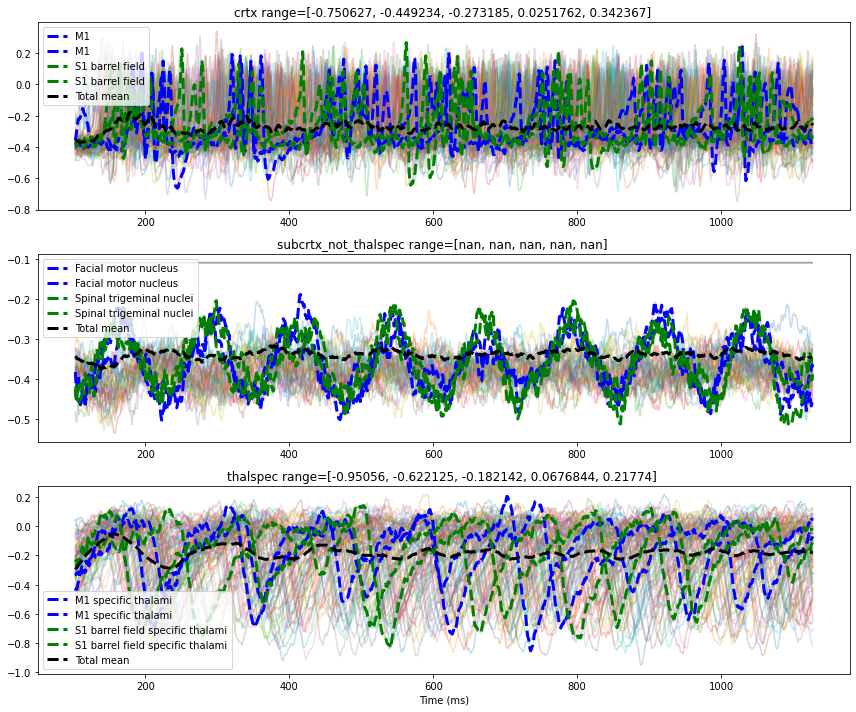

In [12]:
source_ts = plot_tvb(transient, inds, results=results, source_ts=None, bold_ts=None,
                     simulator=simulator, plotter=plotter, config=config, write_files=write_files)[0]

In [13]:
# Get spike events from NEST spike recorders
events = nest_network.output_devices['mossy_fibers']['Right Ansiform lobule'].get_events()

In [14]:
# Compute approximate average rate of mossy fibers as:
# number_of_spikes / (number_of_neurons * time_length_in_ms) * 1000 (to convert to spikes/sec)

print("Last spike time: %g" % events['times'][-1])

for duration in range(1000, 10000, 1000):
    # duration = 1000.0  
    n_spikes = np.sum(events['times'] > events['times'][-1] - duration)
    print("Approximate mossy_fibers rate during the last %g ms = %g" % 
          (duration, n_spikes / 
                      (nest_network.output_devices['mossy_fibers']['Right Ansiform lobule'].number_of_neurons 
                       * duration) * 1000))



Last spike time: 1128.7
Approximate mossy_fibers rate during the last 1000 ms = 7.65812
Approximate mossy_fibers rate during the last 2000 ms = 4.37607
Approximate mossy_fibers rate during the last 3000 ms = 2.91738
Approximate mossy_fibers rate during the last 4000 ms = 2.18803
Approximate mossy_fibers rate during the last 5000 ms = 1.75043
Approximate mossy_fibers rate during the last 6000 ms = 1.45869
Approximate mossy_fibers rate during the last 7000 ms = 1.25031
Approximate mossy_fibers rate during the last 8000 ms = 1.09402
Approximate mossy_fibers rate during the last 9000 ms = 0.97246


In [15]:
# Node coupling values towards all regions for the last synchronization time:
node_coupling = simulator._loop_compute_node_coupling(simulator.current_step)
# min, mean, max values to get a feeling of scale:
print([node_coupling.min(), node_coupling.mean(), node_coupling.max()])
print(node_coupling[0][inds["ansilob"]])  # node_coupling[cvar, region_id, mode]
print(node_coupling[0][inds["oliv"]])

[nan, nan, nan]
[[3.3489547]
 [3.5146909]]
[[3.713115 ]
 [3.2023175]]


In [16]:
# The last values in the TVB -> NEST transformer input buffer 
# (i.e., node couplines towards mossy fibers region nodes, i.e., towards Ansiform Lobule)
simulator.output_interfaces.interfaces[0].transformer.input_buffer
# simulator.input_interfaces.interfaces[0].transformer.input_buffer

array([[3.5656328, 3.5141163, 3.5087101, 3.5739255, 3.522066 , 3.507802 ,
        3.510718 , 3.5115144, 3.4218903, 3.3489547],
       [3.1275172, 3.1887174, 3.2656565, 3.3333497, 3.4081411, 3.4469442,
        3.448527 , 3.4870296, 3.4932132, 3.5146909]], dtype=float32)

In [17]:
# Transformer output buffer rates, after scaling in the transformer with the scale_factor parameter
simulator.output_interfaces.interfaces[0].transformer.output_buffer
# simulator.input_interfaces.interfaces[0].transformer.output_buffer


array([[2.089238 , 2.0590525, 2.0558848, 2.094097 , 2.0637107, 2.0553527,
        2.0570614, 2.057528 , 2.005014 , 1.9622781],
       [1.8325297, 1.8683891, 1.9134706, 1.9531345, 1.9969577, 2.0196939,
        2.0206213, 2.0431814, 2.0468047, 2.059389 ]], dtype=float32)

In [18]:
# The rates that were transferred to the corresponding spike generator device in NEST:
simulator.output_interfaces.interfaces[0].proxy.target[0].Get()
# simulator.input_interfaces.interfaces[0].proxy.source[0].Get()

{'allow_offgrid_times': True,
 'element_type': 'stimulator',
 'frozen': False,
 'global_id': 63825,
 'label': '',
 'local': True,
 'model': 'inhomogeneous_poisson_generator',
 'node_uses_wfr': False,
 'origin': 0.0,
 'rate_times': array([1128.05, 1128.15, 1128.25, 1128.35, 1128.45, 1128.55, 1128.65,
        1128.75, 1128.85, 1128.95]),
 'rate_values': array([2.08923793, 2.05905247, 2.05588484, 2.0940969 , 2.06371069,
        2.05535269, 2.05706143, 2.05752802, 2.00501394, 1.96227813]),
 'start': 0.0,
 'stimulus_source': '0',
 'stop': 1.7976931348623157e+308,
 'thread': 0,
 'thread_local_id': 63824,
 'vp': 0}

In [19]:
# !!!TAKES TOO MUCH TIME AND FREEZES KERNEL!!!
# plot_nest_results(nest_network, neuron_models, neuron_number, config)